# 📚 Importing the libraries 📚

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

# 📖 Importing and reading the dataset 📖

In [2]:
df = pd.read_csv('/kaggle/input/performance-prediction/summary.csv')
df

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1340 non-null   object 
 1   GamesPlayed        1340 non-null   int64  
 2   MinutesPlayed      1340 non-null   float64
 3   PointsPerGame      1340 non-null   float64
 4   FieldGoalsMade     1340 non-null   float64
 5   FieldGoalsAttempt  1340 non-null   float64
 6   FieldGoalPercent   1340 non-null   float64
 7   3PointMade         1340 non-null   float64
 8   3PointAttempt      1340 non-null   float64
 9   3PointPercent      1329 non-null   float64
 10  FreeThrowMade      1340 non-null   float64
 11  FreeThrowAttempt   1340 non-null   float64
 12  FreeThrowPercent   1340 non-null   float64
 13  OffensiveRebounds  1340 non-null   float64
 14  DefensiveRebounds  1340 non-null   float64
 15  Rebounds           1340 non-null   float64
 16  Assists            1340 

**We have 11 null values for 3PointPercent. Let's deal with after a short while. Let's visualize a bit!**

# 📊 Visualization 📊

**Correlation**

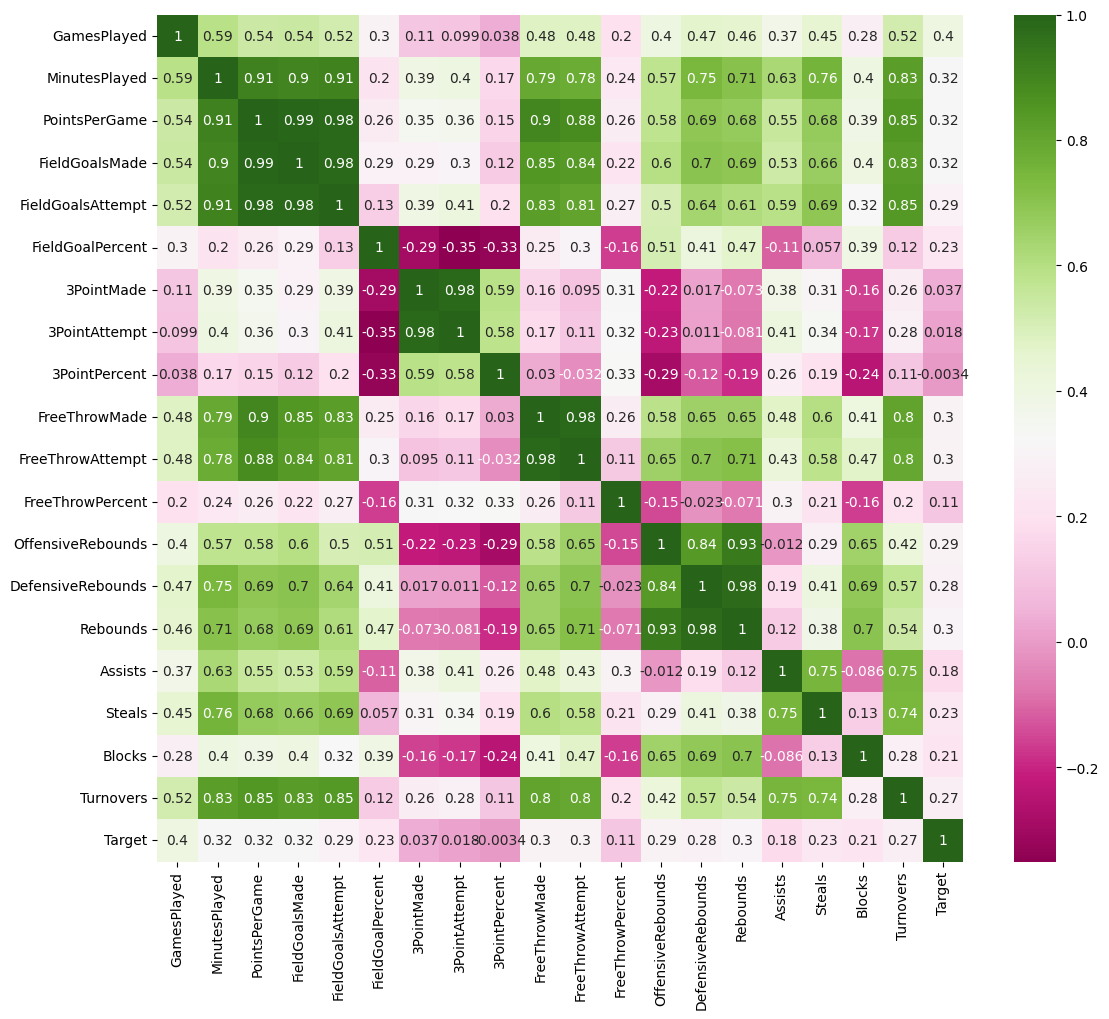

In [4]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='PiYG')
plt.show()

**Our target variable 'Target' seems good with fair bit of shares of correlation from different features**

**However we do see a few high correlations between features**

**- FreeThrowAttempt and FreeThrowMade are highly correlated (0.98). This is quite obvious.**

**- PointsPerGame is highly correlated with FieldGoalsMade and FieldGoalsAttempt. Again self explanatory**

**- 3PointMade is highly correlated with 3PointAttempt**

**- DefensiveRebounds is highly correlated with Rebounds**

**We'll deal with these highly correlated features in the pre-processing section**

![Basketball](https://smartabase.com/wp-content/uploads/2022/05/top-5-integ-bball-header-1024x347.jpg)

**Games Played vs Minutes Played**

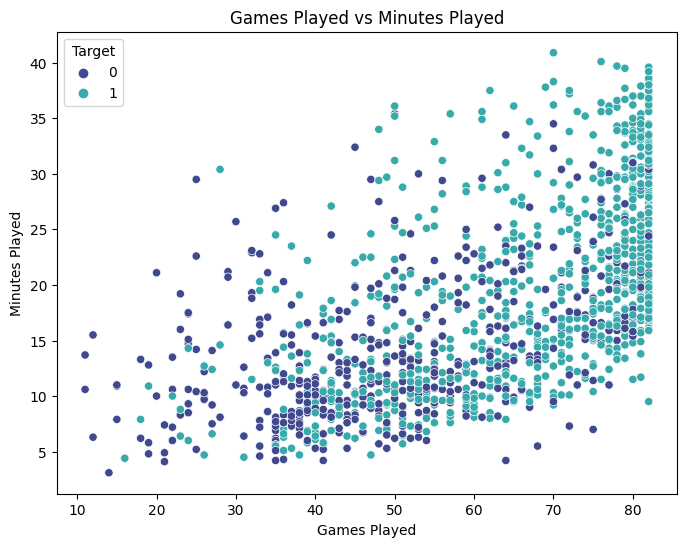

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'GamesPlayed', y = 'MinutesPlayed', hue = 'Target',data=df, palette='mako')
plt.title('Games Played vs Minutes Played')
plt.xlabel('Games Played')
plt.ylabel('Minutes Played')
plt.show()

**Field Goals Made vs Assists**

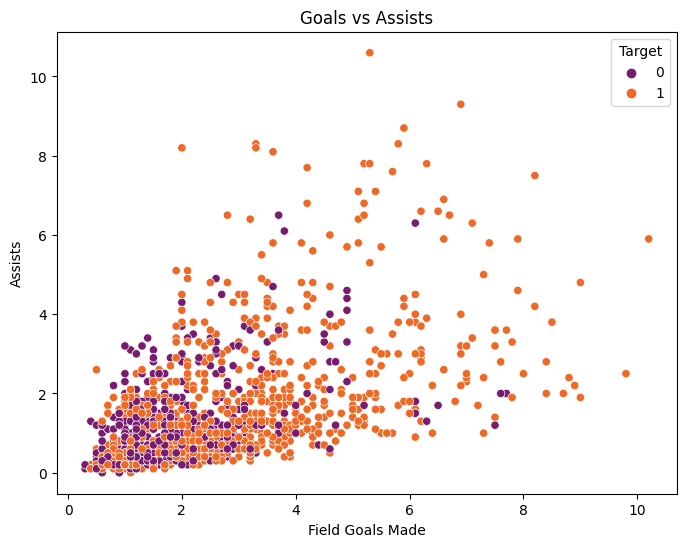

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'FieldGoalsMade', y = 'Assists', hue = 'Target',data=df, palette='inferno')
plt.title('Goals vs Assists')
plt.xlabel('Field Goals Made')
plt.ylabel('Assists')
plt.show()

# ⚙️ Pre-Processing ⚙️

**Let's look at our dataframe again**

In [7]:
df

,Name,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


**First of all, we can agree that we don't need the 'Name' column. So let's drop it**

In [8]:
df.drop('Name',axis=1,inplace=True)

**Remember we had missing values for a column? Let's fill those!**

In [9]:
df[df['3PointPercent'].isna()]

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalsMade,FieldGoalsAttempt,FieldGoalPercent,3PointMade,3PointAttempt,3PointPercent,FreeThrowMade,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,DefensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers,Target
338,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
339,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0
340,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0
358,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1
386,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1
397,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0
507,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0
509,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1
510,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1
521,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0


**We can clearly see that we can replace NaN here with 0 since 3PointPercent is nothing but 3PointMade divided by 3PointAttempt**

In [10]:
df['3PointPercent'] = df['3PointPercent'].fillna(0.0)

In [11]:
print("Current no.of missing values in dataset :\n",df.isna().sum())

Current no.of missing values in dataset :
 GamesPlayed          0
MinutesPlayed        0
PointsPerGame        0
FieldGoalsMade       0
FieldGoalsAttempt    0
FieldGoalPercent     0
3PointMade           0
3PointAttempt        0
3PointPercent        0
FreeThrowMade        0
FreeThrowAttempt     0
FreeThrowPercent     0
OffensiveRebounds    0
DefensiveRebounds    0
Rebounds             0
Assists              0
Steals               0
Blocks               0
Turnovers            0
Target               0
dtype: int64


**We have no missing values now. Great!!**

**Let's try dropping highly correlated features (Let's give a threshold of 95% correlation)**
**Also for multi-collinearity, after careful observation from correlation matric table a little above, we remove the one which has compartively less correlation with target**

In [12]:
df.drop(['FieldGoalsMade','FieldGoalsAttempt','3PointAttempt','FreeThrowMade','DefensiveRebounds'],axis=1,inplace=True)

**Also 3PointMade and 3PointPercent are very lowly correlated with Target. Let's drop those**

In [13]:
df.drop(['3PointMade','3PointPercent'],axis=1,inplace=True)

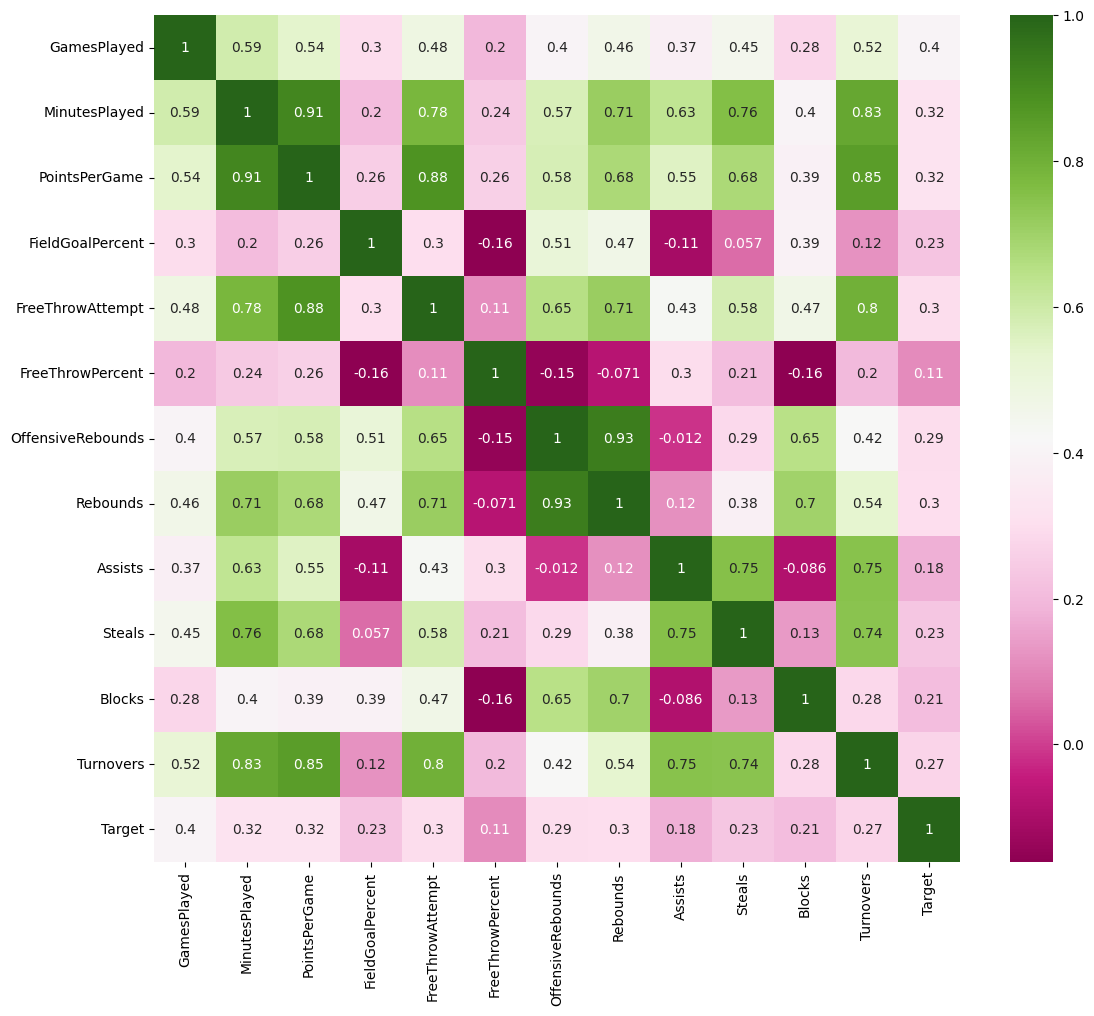

In [14]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')
plt.show()

**Standardization**

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

**Splitting data**

In [16]:
y = df['Target']
X = df.drop('Target',axis=1)

In [17]:
X = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
X

,GamesPlayed,MinutesPlayed,PointsPerGame,FieldGoalPercent,FreeThrowAttempt,FreeThrowPercent,OffensiveRebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,-1.400901,1.177066,0.137401,-1.543407,0.361484,-0.037855,-0.398290,0.517997,0.237640,-0.533458,0.073254,0.147338
1,-1.458281,1.116860,0.091486,-2.374651,1.193248,0.586286,-0.655746,-0.308447,1.461613,1.175502,0.306415,0.562695
2,0.779563,-0.279912,-0.367659,-0.320991,-0.394665,-0.312099,-0.655746,-0.405676,-0.374347,-0.289321,-0.159906,-0.268019
3,-0.138527,-0.725434,-0.252873,-0.255795,-0.394665,-0.132422,-0.012104,-0.551519,-0.510344,-0.045184,-0.626228,-0.268019
4,-0.712333,-0.737475,-0.528360,1.341496,0.059025,-0.274272,-0.012104,-0.259833,-0.850337,-0.777595,0.073254,-0.544923
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1.123847,-0.219706,-0.574274,-0.141703,-0.243435,0.841617,-0.784475,-0.891819,0.645631,-0.045184,-0.393067,-0.544923
1336,0.435279,-0.605022,-0.666103,-1.364120,-0.621509,0.860530,-0.784475,-0.745976,0.509634,0.443091,-0.859388,0.147338
1337,-0.999236,-0.665228,-0.321744,1.765267,-0.167820,-0.567429,0.631538,0.372154,-0.850337,-0.777595,0.073254,-0.406471
1338,-0.482811,-0.677269,-0.528360,-0.043910,-0.016590,-0.737650,-1.041932,-1.134891,0.441635,-0.533458,-0.626228,-0.544923


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# 🛠️ Model building and predictions 🛠️

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [20]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Support Vector":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Bagging":BaggingClassifier(),
    "Gradien Boosting":GradientBoostingClassifier(),
    "MLP":MLPClassifier()
}

In [21]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+ ' : {:.2f}'.format(model.score(X_test,y_test)*100))

Logistic Regression : 73.38
Support Vector : 72.14
Decision Tree : 58.96
Random Forest : 66.42
AdaBoost : 68.66
Bagging : 68.16
Gradien Boosting : 68.16
MLP : 70.15


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Logistic Regression seems to perform the best. The accuracy are not that good but it's okay, we can definitely do better pre-processing to improve the results. For now less focus a bit on clustering**

# 📈 Clustering 📉

In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [23]:
pca = PCA(n_components=2)
new_X = pd.DataFrame(pca.fit_transform(X_train),index=X_train.index, columns=['P1','P2'])

In [24]:
new_X

,P1,P2
1177,-1.048771,1.187943
1080,-2.774415,-0.464829
332,-0.650367,0.917684
355,5.637956,1.963758
138,0.038993,0.487364
...,...,...
1095,1.040476,-1.515547
1130,0.941030,-2.325757
1294,-1.058493,-1.360019
860,1.318351,0.921265


**KMeans Clustering**

In [25]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X_train)
clusters = pd.Series(kmeans.labels_, name='Cluster',index=X_train.index)

new_X = pd.concat([new_X,y_train,clusters],axis=1)
new_X

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,P1,P2,Target,Cluster
1177,-1.048771,1.187943,1,1
1080,-2.774415,-0.464829,1,1
332,-0.650367,0.917684,0,0
355,5.637956,1.963758,1,3
138,0.038993,0.487364,1,0
...,...,...,...,...
1095,1.040476,-1.515547,1,2
1130,0.941030,-2.325757,1,2
1294,-1.058493,-1.360019,1,1
860,1.318351,0.921265,1,0


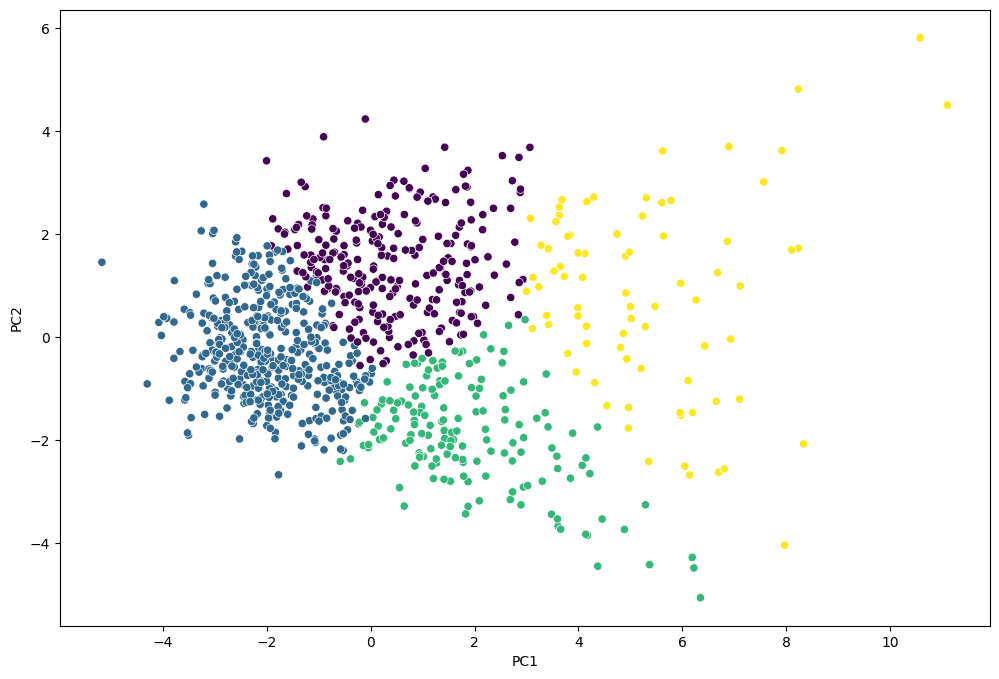

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = new_X['P1'],y = new_X['P2'],c=new_X['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()